# Introduction

Today we spent most of our time discussing the Asch paper. It's difficult to reproduce that discussion and mostly it was to set the tone for the next few weeks. So enjoy these short notes today and dedicate more attention to thinking about how you would model the data from Asch's paper.

We did however cover a couple of new programming concepts.

# Pandas and dataframes

We'll use a package called Pandas to help us organize, read, and store datasets. Pandas resolves around special objects called "dataframes". They are like arrays but they have more dimensions and labels. Those labels and dimensions help with organization. Here is how you import data with pandas.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

url = "https://raw.githubusercontent.com/daniel-saunders-phil/cogs-303/main/Asch_experiment_1_data"
url = r"C:\Users\dsaun\github_projects\cogs-303\Asch_experiment_1_data" # local path - ignore this

data = pd.read_csv(url)
data

,treatment,mistakes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
82,0,0
83,0,0
84,0,0
85,0,1


This looks more like a spreadsheat than arrays or lists do. Each row is a participant in the experiment. The `treatment` column is filled with 1 or 0. 1 if they were in the critical group with all the confederates. 0 if they are in the control group. The `mistakes` row lists how many mistakes each person made.

In this course, we'll just import datasets from cloud storage sites and I'll provide the urls. So this `pd.read_csv(url)` will be standard protocol for us.

We need to do two things to work with DataFrames: unpack them and filter them.

## unpacking

The way we access the values in a column works like this

NAME_OF_DATAFRAME.NAME_OF_COLUMN.values

we get back an array, which we are more used to working with.

In [6]:
data.mistakes.values

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,
        5,  6,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  2], dtype=int64)

Here's how to interpret this information. This array depicts the number of mistakes made by each participant. The treatment group is listed first. So you can see that 13 people made 0 mistakes in that group. Then, skipping ahead, 3 people made 10 mistakes. One person made 11 mistakes.

The rest of the array is for the control group. Only two people made any mistakes at all, listed at the end.

The fact both groups are listed together is kinda annoying. So it would help if we could look at one group at a time.

## Filtering

To filter a dataframe, we write boolean conditions. Suppose we want just the people in the treatment group. We can set a condition where it's true only if someone is in that group. For example,

In [7]:
[data.treatment == 1]

[0      True
 1      True
 2      True
 3      True
 4      True
       ...  
 82    False
 83    False
 84    False
 85    False
 86    False
 Name: treatment, Length: 87, dtype: bool]

Then to filter, we just put our condition in brackets beside the dataframe's name.

In [5]:
data_treatment = data[data.treatment == 1]
data_treatment

,treatment,mistakes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


A smaller dataframe with only the people we want. Alternatively, if we want just the control group.

In [3]:
data_control = data[data.treatment == 0]

## Plotting

It would be nice if we could an initial picture of what these data look like. So let's count up the number of people who made each type of mistake. We'll use a counting algorithm you've seen before. The only trick is we have to convert our arrays to lists first.

<BarContainer object of 13 artists>

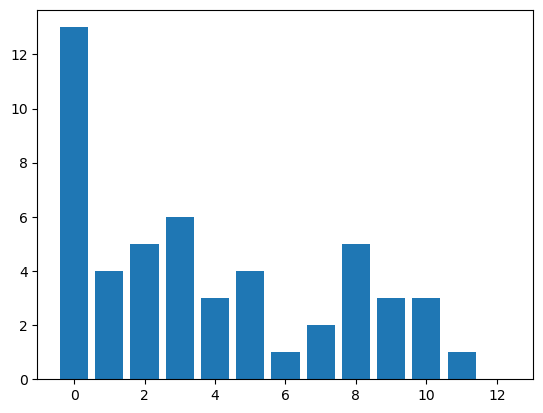

In [6]:
mistakes_treatment = list(data_treatment.mistakes.values)

outcomes = range(13)
counts = []

for i in outcomes:
  matches = mistakes_treatment.count(i)
  counts.append(matches)

plt.bar(outcomes,counts)

<BarContainer object of 13 artists>

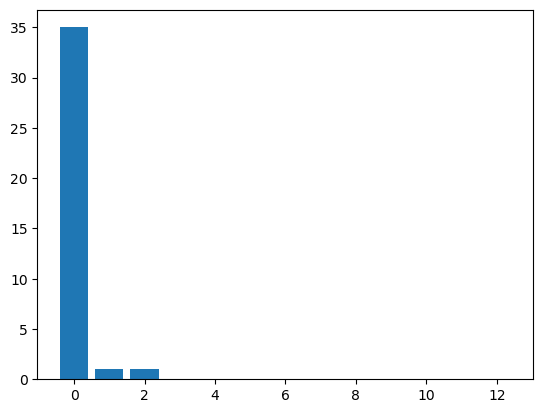

In [7]:
mistakes_control = list(data_control.mistakes.values)

outcomes = range(13)
counts = []

for i in outcomes:
  matches = mistakes_control.count(i)
  counts.append(matches)

plt.bar(outcomes,counts)

# Descriptions of data versus models

Asch has this funny little sentence right before he presents his main data:

>The quantitative results are clear and unambiguous.

I want you to appreciate this is not the type of sentence that can be true. It's not that Asch's data are more ambiguious that he hopes. It just that data do not mean anything in particular in the absence of a model. The data is unambiguous in support of what? Asch doesn't say because, you might notice, there are no models or statistics in the whole paper. What Asch has, instead, are descriptive numbers. The numbers tell us what happened in the actual experiment.

It's worth drawing out this contrast very explicitly. Usually, we are not interested in just the numbers recorded in an experiment. We are interested in how those numbers speak to a bigger, underlying, and repeatable process. The model describes that process. The data provide clues about that process once we do stuff like estimation or testing. But by itself, the data are just a record of what happened in this one case.

So our first mission is to develop some models that let us evaluate how ambigiuous or unambigious the data really are.

## A binomial process model

Next class, we'll think long and hard about how to make a good model. But let's make a bad model. The point of this is two fold (1) it's easy to do. We've already made a few binomial models, so we can quickly apply it to our problem (2) it provides a good starting place for criticism. When we build our better model, it will make the failures of the binomial really obvious.

Notice Asch's experiment and the Lady tasting tea problem have a lot in common. The outcome is binary - you guess right or wrong. We think people have some accuracy level. In the control group, that accuracy level represents perceptual accuracy. Most people do really well at judging the length of lines. In the treatment group, that accuracy represent the strengh of the conformity effect. We know that the stock lady tasting tea model is well described by the binomial distribution.

So to scale up our binomial to handle this experiment, we need two steps

1. Assume each participant has constant accuracy throughout the duration of the experiment.
2. Assume each participant in an experimental group has the same accuracy level.

Now we just have to estimate the accuracy level in the control and treatment group. It makes the problem fairly simple.

But also notice these assumptions are clearly and obviously wrong. Accuracy should vary over time as confidence erodes. And, Asch's interviews make it very clear that participants are fairly different - some conform a lot. Others stand firm. So it would help if we could replace that assumption - next class we will.

To develop our intuiton, we'll find the likelihood of the data given a single parameter value. Let's assume that the treatment group has 50% accuracy. We can write code like this to find the likelihood of each observation, given that parameter value.

In [14]:
stats.binom(p=0.5,n=12).pmf(mistakes_treatment)

array([0.00024414, 0.00024414, 0.00024414, 0.00024414, 0.00024414,
       0.00024414, 0.00024414, 0.00024414, 0.00024414, 0.00024414,
       0.00024414, 0.00024414, 0.00024414, 0.00292969, 0.00292969,
       0.00292969, 0.00292969, 0.01611328, 0.01611328, 0.01611328,
       0.01611328, 0.01611328, 0.05371094, 0.05371094, 0.05371094,
       0.05371094, 0.05371094, 0.05371094, 0.12084961, 0.12084961,
       0.12084961, 0.19335938, 0.19335938, 0.19335938, 0.19335938,
       0.22558594, 0.19335938, 0.19335938, 0.12084961, 0.12084961,
       0.12084961, 0.12084961, 0.12084961, 0.05371094, 0.05371094,
       0.05371094, 0.01611328, 0.01611328, 0.01611328, 0.00292969])

Notice a difference between the lady tasting tea problem and the Asch problem. Before we got a single observation because we had a single participant - Lady Bristol. Now we have a whole bunch of participants and we get a likelihood for each one. What we really want is a single likelihood that summarizes how probable the whole dataset is, given our model. To find that, we multiply every likelihood together.

In [16]:
np.prod(stats.binom(p=0.5,n=12).pmf(mistakes_treatment))

2.142540775076649e-98

You'll notice that we get a very small number. The `e-98` means there are 98 `0`s between the decimal place and where the displayed number starts. Like

$$0.000 ... 000214540775076649 $$

This is normal and expected with probabilities in realistic statistical problems. 

Now our goal is to estimate the parameters of the binomial model. We picked 0.5 as our parameter before. But what is the best guess for that parameter and what is the uncertainty around that estimate? We'll use the bayesian approach. So set up a grid:

In [17]:
# grid

grid = np.linspace(0,1,200)

The prior is a bit harder: what do we think about the accuracy rate in this case? Remember, we are working backward from what did before - estimating the number of successes vs. estimating the number of failures.

The sort of reasoning we've used before won't work in this case. Let's try a similar argument and see what's wrong. Suppose someone showed up, forgot their glasses and ignored everyone else. They might just say a number at random. There are three possible lines in this experiment so they should fail about 33% of the time. So we might be tempted to put an upper boundary at 33%.

I think that's too low - if you're going along with the crowd, you could be swayed to fail every time. So it's reasonable to think the failure rate could be as high as 100%.

In [10]:
# prior

prior = np.ones(200) / 200

Now we just calculate the likelihood for each group, execute bayes theorem and plot.

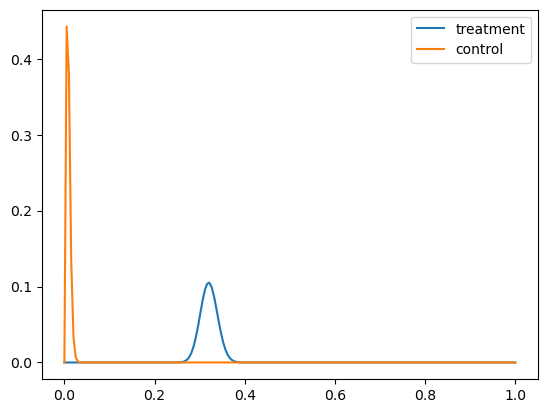

In [18]:
# likelihood

likelihood = [np.prod(stats.binom(p=p,n=12).pmf(mistakes_treatment)) for p in grid]
post = prior * likelihood
post_treatment = post / sum(post)

# control group

likelihood = [np.prod(stats.binom(p=p,n=12).pmf(mistakes_control)) for p in grid]
post = prior * likelihood
post_control = post / sum(post)

plt.plot(grid,post_treatment,label="treatment")
plt.plot(grid,post_control,label="control")
plt.legend()

How should we interpret these graphs? They depict the uncertainty around the possible error rates for each group. The model is very confident the control group error rate is less than 0.05. The whole distribution spikes at the bottom. 

The model is less sure where to put the treatment group. They could have an error rate around 0.25-0.38, give or take a bit. But mostly the model thinks it's 0.33.

We'll stop here. The initial conclusion is that Asch is basically right - the two groups are clearly different. But two caveats:
1. We only get to say that because we have an explicit model.
2. Our model sucks. So I would be curious to see whether Asch's conclusion holds up as we work toward a better model.